In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests as req
import time
import json
import csv
from datetime import datetime as dt
import os
# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
#country_code= []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

In [3]:
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
   # If the city is unique, then add it to a our cities list, it has to be in the loop withing the indeneted sapce to check each city as being addeed to the list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm <500 countries were generated
len(cities) 

    

649

## Perform API Calls

In [4]:
## set up additional columns to hold information
#City_df["City"] = ""
#City_df["Country"] = ""
#City_df.set_value(index, "City", city)
#City_df.set_value(index, "Country", country)

weather_key=api_keys.api_key
URL="http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="+weather_key
#URL="http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="+weather_key
citi_weather=[]

for city in cities:
    city_URL=URL+'&q='+city
    #print("processing record for the city %s.URL: %s" % (city, city_URL))
    print('processing record for the city %s'%city)
    #for date in city_data:
    # https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
    # http://strftime.org/
    #converted_time = datetime.strptime(raw_time, "%a %b %d %H:%M:%S %z %Y")
    #converted_timestamps.append(converted_time)
        
    try:

        city_data=req.get(city_URL).json()
        city_lat=city_data["coord"]["lat"]
        city_lon=city_data["coord"]["lon"]
        city_temp=city_data["main"]["temp"]
        city_hum=city_data["main"]["humidity"]
        city_pr=city_data["main"]["pressure"]
        city_ws=city_data["wind"]["speed"]
        city_cl=city_data["clouds"]["all"]
        city_cc=city_data["sys"]["country"]
        city_date=city_data["dt"]

        citi_weather.append({"city":city, 
        "latitude":city_lat,
        "longitude":city_lon,
        "temperature":city_temp,
        "humidity":city_hum,
        "pressure":city_pr,
        "wind speed":city_ws,
        "clouds":city_cl,
        "country code":city_cc,
        "Date":city_date
})
    except:
        print('city not found')
    pass


processing record for the city kaeo
processing record for the city sumbawa
city not found
processing record for the city guerrero negro
processing record for the city rikitea
processing record for the city bluff
processing record for the city mount gambier
processing record for the city idrinskoye
processing record for the city phalaborwa
processing record for the city aklavik
processing record for the city new norfolk
processing record for the city bolungarvik
city not found
processing record for the city port lincoln
processing record for the city roshchino
processing record for the city castro
processing record for the city jati
processing record for the city disna
city not found
processing record for the city san quintin
processing record for the city chuy
processing record for the city taolanaro
city not found
processing record for the city airai
processing record for the city lerwick
processing record for the city sola
processing record for the city manicore
processing record for

processing record for the city idaho falls
processing record for the city marawi
processing record for the city saint quentin
city not found
processing record for the city caucaia
processing record for the city saint-pierre
processing record for the city bose
processing record for the city kununurra
processing record for the city san patricio
processing record for the city xalpatlahuac
processing record for the city torbay
processing record for the city birao
processing record for the city sentyabrskiy
city not found
processing record for the city codrington
processing record for the city egvekinot
processing record for the city havre-saint-pierre
processing record for the city lalibela
processing record for the city lavrentiya
processing record for the city livingston
processing record for the city boa vista
processing record for the city taksimo
processing record for the city srednekolymsk
processing record for the city luwuk
processing record for the city along
processing record for

processing record for the city khor
processing record for the city nouakchott
processing record for the city talnakh
processing record for the city katobu
processing record for the city poum
processing record for the city zhezkazgan
processing record for the city iquique
processing record for the city bereda
processing record for the city christchurch
processing record for the city osypenko
processing record for the city aykhal
processing record for the city ribeira grande
processing record for the city bur gabo
city not found
processing record for the city komsomolskiy
processing record for the city nemuro
processing record for the city dillon
processing record for the city paidha
processing record for the city sume
processing record for the city vila
processing record for the city gayeri
processing record for the city bathsheba
processing record for the city seymchan
processing record for the city hami
processing record for the city faya
processing record for the city maceio
processi

processing record for the city eydhafushi
processing record for the city redlands
processing record for the city rincon
processing record for the city mudhol
processing record for the city mian channun
processing record for the city axim
processing record for the city maldonado
processing record for the city karistos
city not found
processing record for the city barabinsk
processing record for the city skjervoy
processing record for the city hihifo
city not found
processing record for the city lima
processing record for the city milingimbi
city not found
processing record for the city iquitos
processing record for the city maumere
processing record for the city laguna
processing record for the city mahadday weyne
city not found
processing record for the city tabukiniberu
city not found
processing record for the city waiuku
processing record for the city lubumbashi
processing record for the city kirakira
processing record for the city wulanhaote
city not found
processing record for the 

In [5]:
#create csv file"cities" in a folder named output_file
#convert to dataframe first and save as csv file
city_data_df=pd.DataFrame(citi_weather)
latitude= city_data_df["latitude"]
longitude=city_data_df["longitude"]
temperature=city_data_df["temperature"]
humidity=city_data_df["humidity"]
pressure=city_data_df["pressure"]
wind_speed=city_data_df["wind speed"]
clouds=city_data_df["clouds"]
country=city_data_df["country code"]
date=city_data_df['Date'] 

city_data_df.head()        


#city_data_df.to_csv("output_data/cities.csv")



,Date,city,clouds,country code,humidity,latitude,longitude,pressure,temperature,wind speed
0,1533656173,kaeo,80,NZ,80,-35.10,173.78,1012.66,47.45,5.93
1,1533656174,guerrero negro,12,MX,83,27.97,-114.04,1011.20,73.73,3.47
2,1533656174,rikitea,32,PF,100,-23.12,-134.97,1033.41,73.19,2.35
3,1533656175,bluff,0,AU,55,-23.58,149.07,1008.69,45.02,3.91
4,1533656175,mount gambier,44,AU,93,-37.83,140.78,1008.45,51.59,9.40


In [8]:
# to save city data as csv in output folder
city_data_df.to_csv("output_data/cities.csv")

In [9]:
city_data_df.dtypes

Date              int64
city             object
clouds            int64
country code     object
humidity          int64
latitude        float64
longitude       float64
pressure        float64
temperature     float64
wind speed      float64
dtype: object

In [10]:
#to check number of cities imported through citipy with weather parameters 
city_data_df.count()

Date            575
city            575
clouds          575
country code    575
humidity        575
latitude        575
longitude       575
pressure        575
temperature     575
wind speed      575
dtype: int64

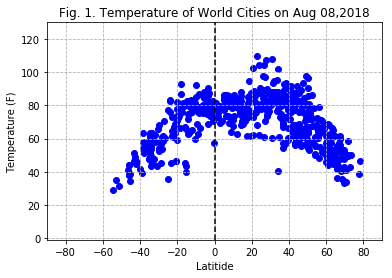

In [11]:
# Build a scatter plot for each data type
plt.scatter(city_data_df["latitude"], city_data_df["temperature"], marker="o", color="blue")

# Incorporate the other graph properties
plt.title("Fig. 1. Temperature of World Cities on Aug 08,2018")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitide")
plt.grid(linestyle="dashed")
plt.ylim(-1,130)
plt.xlim(-90,90)
plt.xticks(rotation='horizontal')
plt.axvline(x=0, color = 'black',linestyle="dashed") #adds a vertical line at the equator
# Save the figure
plt.savefig("temperatureofWorldCities.png")

# Show plot
plt.show()

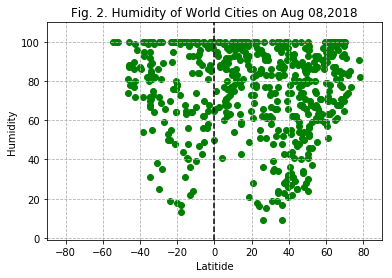

In [12]:
# Build a scatter plot for each data type
plt.scatter(city_data_df["latitude"], city_data_df["humidity"], marker="o", color="green")

# Incorporate the other graph properties
plt.title("Fig. 2. Humidity of World Cities on Aug 08,2018")
plt.ylabel("Humidity")
plt.xlabel("Latitide")
plt.grid(linestyle="dashed")
plt.ylim(-1,110)
plt.xlim(-90,90)
plt.xticks(rotation='horizontal')
plt.axvline(x=0, color = 'black',linestyle="dashed") #adds a vertical line at the equator
# Save the figure
plt.savefig("HumidityofWorldCities.png")

# Show plot
plt.show()

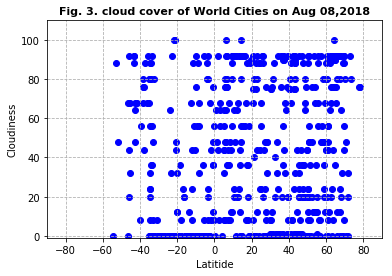

In [13]:
# Build a scatter plot for each data type
plt.scatter(city_data_df["latitude"], city_data_df["clouds"], marker="o", color="blue")

# Incorporate the other graph properties
plt.title("Fig. 3. cloud cover of World Cities on Aug 08,2018", fontdict = {'fontsize': 11, 'fontweight': 'bold'})
plt.ylabel("Cloudiness")
plt.xlabel("Latitide")
plt.grid(linestyle="dashed")
plt.ylim(-1,110)
plt.xlim(-90,90)

# Save the figure
plt.savefig("CloudCoverofWorldCities.png")

# Show plot
plt.show()

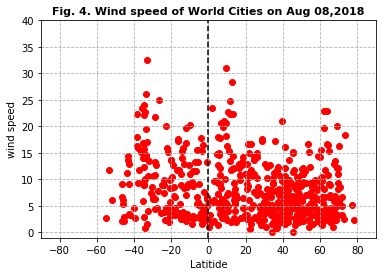

In [14]:
# Build a scatter plot for each data type
plt.scatter(city_data_df["latitude"], city_data_df["wind speed"], marker="o", color="red")

# Incorporate the other graph properties
plt.title("Fig. 4. Wind speed of World Cities on Aug 08,2018",fontdict = {'fontsize': 11, 'fontweight': 'bold'})
plt.ylabel("wind speed")
plt.xlabel("Latitide")
plt.grid(linestyle="dashed")
plt.ylim(-1,40)
plt.xlim(-90,90)
plt.xticks(rotation='horizontal')
plt.axvline(x=0, color = 'black',linestyle="dashed") #adds a vertical line at the equator
# Save the figure
plt.savefig("windspeedofWorldCities.png")

# Show plot
plt.show()

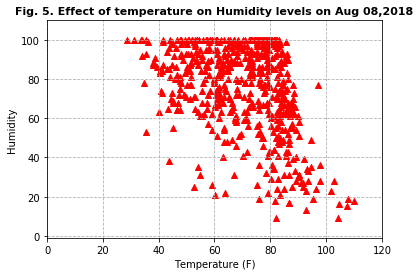

In [15]:
#to observe effect of clouds on Temperature
# Build a scatter plot for each data type
plt.scatter(city_data_df["temperature"], city_data_df["humidity"], marker="^", color="red")

# Incorporate the other graph properties
plt.title("Fig. 5. Effect of temperature on Humidity levels on Aug 08,2018",fontdict = {'fontsize': 11, 'fontweight': 'bold'})
plt.ylabel("Humidity")
plt.xlabel("Temperature (F)")
plt.grid(linestyle="dashed")
plt.ylim(-1,110)
plt.xlim(-0,120)
#plt.xticks(rotation='horizontal')
#plt.axvline(x=0, color = 'black',linestyle="dashed") #adds a vertical line at the equator
# Save the figure
plt.savefig("temp and humidity ofWorldCities.png")

# Show plot
plt.show()

In [16]:
# display results in .txt file
output_file = os.path.join("output_data", "WeatherPy_Results.txt")
with open(output_file, "w") as datafile:
    datafile.write("WeatherPy_Results\n")
    

   
   

# print out contents of .txt file in terminal
with open(output_file, "r") as f:
   results = f.read()
   print(results)

WeatherPy_Results



In [ ]:
#average_temp = city_data_df.groupby(["temperature"]).mean()["humidity"].rename("Average temperature")
#average_hum = city_data.groupby(["humidity"]).mean()["humidity"].rename("Average temperature")
# Data frame for user_data
#average_temp_data = pd.DataFrame({
                         # "Average temperature": average_temp,
                          #"Average Humidity": average_hum,
                          #})

#average_temp_data
# Display table of top 5 spenders
#average_temp_data.sort_values("", ascending=False).head(5)
groupby_humidity= city_data_df.groupby(['humidity']).mean()["humidity"].rename("Average humidity")
groupby_tempearature=city_data_df.groupby([temperature]).mean()["temperature"].rename("Average temp")
average_data = pd.DataFrame({
                         "Average temperature": average_temp,
                          "Average Humidity": average_hum,
                          })

# Create a DataFrame based on the counts of the groupby object
#cities_counts = groupby_humidity.count()
#cities_counts
average_data

In [ ]:
x_axis=city_data_df["latitude"]
y_axis=city_data_df["clouds"]
plt.scatter((x_axis,y_axis)
plt.xlabel('latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs Cloud Cover on Aug. 08, 2018', fontdict = {'fontsize': 11, 'fontweight': 'bold'})
plt.savefig('cloudcoverofWorldCities.png')
plt.show()

In [ ]:
#converted_time_=[]
#for date in city_data_df:
    # https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
    # http://strftime.org/
    #date = datetime.strptime(raw_time, "%a %b %d %H:%M:%S %z %Y")
    #converted_timestamps.append(converted_time)

In [ ]:
# Rearrangement of columns
#city_data_df = city_data_df[["city","country","latitude","longitude","temperature","humidity","clouds","wind speed"]]
#city_data_df.head()

In [ ]:
#city_data_df.to_csv("output_data/cities.csv", encoding="utf-8")